In [36]:
# Έλεγχος version pyspark .. Θέλουμε το 3.4.1
import pyspark
print(pyspark.__version__)

3.5.0


#### _Cell 2_ Για local λύση προβλήματος. Μπορεί να παραβλεφθεί κατά την εκτέλεση του αρχείου, καθώς δεν προσφέρει πειραματικά δεδομένα.

In [37]:
# (θέλουμε τη Java 17 επειδή μόνο οι Java 8 , Java 11 και Java 17 δουλεύουν με το pyspark)
import os
os.environ["JAVA_HOME"] = "C:\\Program Files\\Java\\jdk-17"
os.environ["PATH"] += ";C:\\Program Files\\Java\\jdk-17\\bin"

In [38]:
from pyspark.sql import SparkSession
import json
from pyspark.sql.functions import col, avg, month, stddev, date_format, max, min
from pyspark.sql.types import TimestampType, FloatType

In [39]:
# Φτιάχνουμε ένα spark session
spark = SparkSession.builder.appName("TemperatureAnalysis").getOrCreate()

In [40]:
# Μετατροπή των text αρχείων σε JSON μορφή για να διαβαστούν με Spark
convert = [["data/tempm.txt", "data/tempm.json", "temperature"], ["data/hum.txt", "data/hum.json" , "humidity"]]
for i,j,string in convert:
    with open(i, 'r') as _txt, open(j, 'w') as _json:
        for line in _txt:
            data = json.loads(line)
            new_data = [{"timestamp": key, string: value} for key, value in data.items()]
            json.dump(new_data, _json)
            _json.write('\n')

tempm_data = spark.read.json("data/tempm.json")
hum_data = spark.read.json("data/hum.json")

In [41]:
# Με την εντολή cast της pyspark μετατρέπω το timestamp απο string σε timestampType
tempm_data = tempm_data.withColumn("timestamp", col("timestamp").cast(TimestampType()))
hum_data = hum_data.withColumn("timestamp", col("timestamp").cast(TimestampType()))

# Με την εντολή cast της pyspark μετατρέπω τη θερμοκρασία και την υγρασία απο string σε float
tempm_data = tempm_data.withColumn("temperature", col("temperature").cast(FloatType()))
hum_data = hum_data.withColumn("humidity", col("humidity").cast(FloatType()))

# Διαχωρισμός της ημερομηνίας από το timestamp με την εντολή cast της pyspark
tempm_data = tempm_data.withColumn("date", col("timestamp").cast("date"))
hum_data = hum_data.withColumn("date", col("timestamp").cast("date"))


In [42]:
# Έλεγχος για το αν διαβάστηκαν σωστά τα δεδομένα Θερμοκρασίας
tempm_data.show()

+-----------+-------------------+----------+
|temperature|          timestamp|      date|
+-----------+-------------------+----------+
|        3.0|2014-02-13 06:20:00|2014-02-13|
|        7.0|2014-02-13 13:50:00|2014-02-13|
|        2.0|2014-02-13 06:00:00|2014-02-13|
|        3.0|2014-02-13 03:00:00|2014-02-13|
|        6.0|2014-02-13 13:00:00|2014-02-13|
|        4.0|2014-02-13 18:50:00|2014-02-13|
|        6.0|2014-02-13 13:20:00|2014-02-13|
|        6.0|2014-02-13 15:00:00|2014-02-13|
|        4.0|2014-02-13 08:50:00|2014-02-13|
|        4.0|2014-02-13 21:50:00|2014-02-13|
|        3.0|2014-02-13 08:00:00|2014-02-13|
|        3.0|2014-02-13 07:50:00|2014-02-13|
|        4.0|2014-02-13 08:20:00|2014-02-13|
|        3.0|2014-02-13 21:20:00|2014-02-13|
|        6.0|2014-02-13 11:50:00|2014-02-13|
|        6.0|2014-02-13 11:20:00|2014-02-13|
|        5.0|2014-02-13 17:50:00|2014-02-13|
|        6.0|2014-02-13 11:00:00|2014-02-13|
|        2.0|2014-02-13 05:50:00|2014-02-13|
|        3

In [43]:
# Έλεγχος για το διαβάστηκαν σωστά τα δεδομένα Υγρασίας
hum_data.show()

+--------+-------------------+----------+
|humidity|          timestamp|      date|
+--------+-------------------+----------+
|    93.0|2014-02-13 06:20:00|2014-02-13|
|    66.0|2014-02-13 13:50:00|2014-02-13|
|    91.0|2014-02-13 06:00:00|2014-02-13|
|    84.0|2014-02-13 03:00:00|2014-02-13|
|    62.0|2014-02-13 13:00:00|2014-02-13|
|    75.0|2014-02-13 18:50:00|2014-02-13|
|    70.0|2014-02-13 13:20:00|2014-02-13|
|    56.0|2014-02-13 15:00:00|2014-02-13|
|    87.0|2014-02-13 08:50:00|2014-02-13|
|    75.0|2014-02-13 21:50:00|2014-02-13|
|    88.0|2014-02-13 08:00:00|2014-02-13|
|    93.0|2014-02-13 07:50:00|2014-02-13|
|    87.0|2014-02-13 08:20:00|2014-02-13|
|    81.0|2014-02-13 21:20:00|2014-02-13|
|    76.0|2014-02-13 11:50:00|2014-02-13|
|    76.0|2014-02-13 11:20:00|2014-02-13|
|    70.0|2014-02-13 17:50:00|2014-02-13|
|    69.0|2014-02-13 11:00:00|2014-02-13|
|    93.0|2014-02-13 05:50:00|2014-02-13|
|    81.0|2014-02-13 20:50:00|2014-02-13|
+--------+-------------------+----

# Ερώτημα 1.1

In [44]:
# Φιλτράρισμα της θερμοκρασίας μεταξύ 18°C και 22°C
filtered_temp = tempm_data.filter((col("temperature") >= 18) & (col("temperature") <= 22))

# Χρήση της στήλης date για ομαδοποίηση των δεδομένων
unique_dates = filtered_temp.select("date").distinct()

# Μέτρηση των διαφορετικών ημερομηνιών 
num_dates = unique_dates.count()

# Εμφάνιση του συνολικού αριθμού των ημερών που η θερμοκρασία ήταν μεταξύ 18°C και 22°C
print("Αριθμός Ημερών με θερμοκρασίες μεταξύ 18 και 22 C:", num_dates)

### EXTRA
 
print("Συγκεκριμένα οι παρακάτω ημερομινίες είχαν θερμοκρασία μεταξύ 18 και 22 C:")
unique_dates.orderBy("date").show(num_dates, truncate=False)


Αριθμός Ημερών με θερμοκρασίες μεταξύ 18 και 22 C: 26
Συγκεκριμένα οι παρακάτω ημερομινίες είχαν θερμοκρασία μεταξύ 18 και 22 C:
+----------+
|date      |
+----------+
|2014-04-20|
|2014-04-22|
|2014-04-26|
|2014-04-27|
|2014-04-28|
|2014-04-29|
|2014-04-30|
|2014-05-17|
|2014-05-18|
|2014-05-19|
|2014-05-20|
|2014-05-21|
|2014-05-22|
|2014-05-23|
|2014-05-24|
|2014-05-25|
|2014-05-26|
|2014-05-27|
|2014-05-30|
|2014-06-01|
|2014-06-02|
|2014-06-03|
|2014-06-04|
|2014-06-05|
|2014-06-07|
|2014-06-08|
+----------+



# Ερώτημα 1.2

##### Παραδοχή : Όταν λεει "10 πιο κρύες μέρες και οι 10 πιο ζεστές μέρες" θα μπορούσε είτε να εννοεί "10 μέρες που περιείχαν την πιο ζεστή θερμοκρασία και 10 μέρες που περιείχαν την πιο ψυχρή". Καταλαβαίνουμε ότι το νοήμα είναι να βρεθούν οι "10 μέρες με τις υψηλότερες average θερμοκρασίες", μιας και διαισθητικά στέκει περισσότερο για τον πραγματικό κόσμο. Οι μέσοι όροι της κάθες ημέρας υπολογίζονται παρακάτω:

In [45]:
# Υπολογισμός μέσου όρου θερμοκρασίας για κάθε μήνα με την εντολή avg της PySpark
daily_avg_temps = tempm_data.groupBy("date").agg(avg("temperature").alias("avg_temperature"))

# Sorting με την συνάρτηση orderBy της pyspark για να βρεθούν οι 10 ημέρες με την  
# υψηλότερη μέση θερμοκρασία και οι 10 ημέρες με την χαμηλότερη μέση θερμοκρασία
top_warmest_days = daily_avg_temps.orderBy(col("avg_temperature").desc()).limit(10)
top_coldest_days = daily_avg_temps.orderBy(col("avg_temperature").asc()).limit(10)


print("Οι 10 ημέρες με την υψηλότερη μέση θερμοκρασία:")
top_warmest_days.show()

print("Οι 10 ημέρες με την χαμηλότερη μέση θερμοκρασία:")
top_coldest_days.show()

Οι 10 ημέρες με την υψηλότερη μέση θερμοκρασία:
+----------+------------------+
|      date|   avg_temperature|
+----------+------------------+
|2014-05-22|              20.0|
|2014-05-21| 17.63888888888889|
|2014-06-08| 17.63888888888889|
|2014-05-23|16.257142857142856|
|2014-06-02|16.056338028169016|
|2014-05-24|15.833333333333334|
|2014-06-03|15.830985915492958|
|2014-06-04|15.710144927536232|
|2014-06-07|15.666666666666666|
|2014-05-25|15.619718309859154|
+----------+------------------+

Οι 10 ημέρες με την χαμηλότερη μέση θερμοκρασία:
+----------+------------------+
|      date|   avg_temperature|
+----------+------------------+
|2014-03-27|2.8260869565217392|
|2014-02-14| 3.391304347826087|
|2014-03-02| 3.857142857142857|
|2014-03-11|3.9027777777777777|
|2014-03-01| 4.083333333333333|
|2014-02-13|               4.1|
|2014-03-03| 4.132075471698113|
|2014-03-25| 4.152777777777778|
|2014-03-05| 4.211267605633803|
|2014-02-17| 4.211267605633803|
+----------+------------------+



# Ερώτημα 1.3

In [46]:
# Αριθμός Μήνα σε Ελληνική Λέξη για να είναι πιο ευανάγνωστο
def convert_to_greek_month(number):
    return {1: 'Ιανουάριος', 2: 'Φεβρουάριος', 3: 'Μάρτιος', 4: 'Απρίλιος', 5: 'Μάιος', 6: 'Ιούνιος', 7: 'Ιούλιος', 8: 'Αύγουστος', 9: 'Σεπτέμβριος', 10: 'Οκτώβριος', 11: 'Νοέμβριος', 12: 'Δεκέμβριος'}.get(number, "Invalid month number")

In [47]:
# Cast του μήνα από το timestamp
humidity_data_filtered = hum_data.withColumn("month", month("timestamp"))

# Χρήση της εντολής stddev για να βρεθεί το standard deviation (=τυπική απόκλιση) της υγρασίας ανά μήνα
monthly_stddev_humidity = humidity_data_filtered.groupBy("month").agg(stddev("humidity").alias("stddev_humidity"))
print("Τυπική απόκλιση της υγρασίας ανά μήνα:")
monthly_stddev_humidity.show()

# Ποιος μήνας είχε την υψηλότερη τυπική απόκλιση;
max_stddev_month = monthly_stddev_humidity.orderBy(col("stddev_humidity").desc()).first()["month"]

print(f"Όπως βλέπουμε, ο μήνας με την υψηλότερη τυπική απόκλιση είναι ο: {convert_to_greek_month(max_stddev_month)} (δηλαδή ο {max_stddev_month}ος μήνας)")

Τυπική απόκλιση της υγρασίας ανά μήνα:
+-----+------------------+
|month|   stddev_humidity|
+-----+------------------+
|    6|15.060744059108561|
|    3|15.234461545276856|
|    5|15.967352950493565|
|    4|17.733347100625892|
|    2| 9.973405675315439|
+-----+------------------+

Όπως βλέπουμε, ο μήνας με την υψηλότερη τυπική απόκλιση είναι ο: Απρίλιος (δηλαδή ο 4ος μήνας)


# Ερώτημα 1.4

In [48]:
# Ένωση των 2 dataframes με την συνάρτηση join για υπολογισμού του δείκτη δυσφορίας
merged_data = tempm_data.join(hum_data, "timestamp", "inner")

# Show the merged DataFrame
merged_data.show()

+-------------------+-----------+----------+--------+----------+
|          timestamp|temperature|      date|humidity|      date|
+-------------------+-----------+----------+--------+----------+
|2014-02-13 06:20:00|        3.0|2014-02-13|    93.0|2014-02-13|
|2014-02-13 13:50:00|        7.0|2014-02-13|    66.0|2014-02-13|
|2014-02-13 06:00:00|        2.0|2014-02-13|    91.0|2014-02-13|
|2014-02-13 03:00:00|        3.0|2014-02-13|    84.0|2014-02-13|
|2014-02-13 13:00:00|        6.0|2014-02-13|    62.0|2014-02-13|
|2014-02-13 18:50:00|        4.0|2014-02-13|    75.0|2014-02-13|
|2014-02-13 13:20:00|        6.0|2014-02-13|    70.0|2014-02-13|
|2014-02-13 15:00:00|        6.0|2014-02-13|    56.0|2014-02-13|
|2014-02-13 08:50:00|        4.0|2014-02-13|    87.0|2014-02-13|
|2014-02-13 21:50:00|        4.0|2014-02-13|    75.0|2014-02-13|
|2014-02-13 08:00:00|        3.0|2014-02-13|    88.0|2014-02-13|
|2014-02-13 07:50:00|        3.0|2014-02-13|    93.0|2014-02-13|
|2014-02-13 08:20:00|    

In [49]:
# Τύπος υπολογισμού δείκτη δυσφορίας
# Με τον τύπο 
# DI = T - 0.55 * ( 1 - 0.01 * RH ) * ( T - 14.5 )
temperature_humidity_data = merged_data.withColumn(
    "discomfort_index",
    col("temperature") - 0.55 * (1 - 0.01 * col("humidity")) * (col("temperature") - 14.5)
)

# Μετατροπή του string σε float
temperature_humidity_data = temperature_humidity_data.withColumn("discomfort_index", col("discomfort_index").cast("float"))

# Εμφάνιση τον δείκτη δυσφορίας όπως υπολογίστηκε για κάθε timestamp
temperature_humidity_data.show()

+-------------------+-----------+----------+--------+----------+----------------+
|          timestamp|temperature|      date|humidity|      date|discomfort_index|
+-------------------+-----------+----------+--------+----------+----------------+
|2014-02-13 06:20:00|        3.0|2014-02-13|    93.0|2014-02-13|         3.44275|
|2014-02-13 13:50:00|        7.0|2014-02-13|    66.0|2014-02-13|          8.4025|
|2014-02-13 06:00:00|        2.0|2014-02-13|    91.0|2014-02-13|         2.61875|
|2014-02-13 03:00:00|        3.0|2014-02-13|    84.0|2014-02-13|           4.012|
|2014-02-13 13:00:00|        6.0|2014-02-13|    62.0|2014-02-13|          7.7765|
|2014-02-13 18:50:00|        4.0|2014-02-13|    75.0|2014-02-13|         5.44375|
|2014-02-13 13:20:00|        6.0|2014-02-13|    70.0|2014-02-13|          7.4025|
|2014-02-13 15:00:00|        6.0|2014-02-13|    56.0|2014-02-13|           8.057|
|2014-02-13 08:50:00|        4.0|2014-02-13|    87.0|2014-02-13|         4.75075|
|2014-02-13 21:5

In [50]:
# Μετά είναι απλό να υπολογιστεί η μέγιστη και ελάχιστη τιμή δυσφορίας κάνοντας
# χρήση των built-in εντολών max και min της PySpark
max_discomfort_index = temperature_humidity_data.agg(max("discomfort_index").alias("max_discomfort_index")).first()["max_discomfort_index"]
min_discomfort_index = temperature_humidity_data.agg(min("discomfort_index").alias("min_discomfort_index")).first()["min_discomfort_index"]

### EXTRA ###

# Κάνουμε αναζήτηση για να βρούμε σε ποια ημερομηνία εμφανίζεται η μέγιστη 
# και η ελάχιστη τιμή δυσφορίας, παρόλο που δε ζητάται από την εκφώνηση
date_with_max_discomfort = temperature_humidity_data.filter(col("discomfort_index") == max_discomfort_index).select("timestamp", "discomfort_index").first()
date_with_min_discomfort = temperature_humidity_data.filter(col("discomfort_index") == min_discomfort_index).select("timestamp", "discomfort_index").first()

print(f"Η μέγιστη τιμή δυσφορίας είναι: {max_discomfort_index} και εμφανίζεται στην ημερομινία: {date_with_max_discomfort['timestamp']}")
print(f"Η ελάχιστη τιμή δυσφορίας είναι: {min_discomfort_index} και εμφανίζεται στην ημερομινία: {date_with_min_discomfort['timestamp']}")

Η μέγιστη τιμή δυσφορίας είναι: 22.112499237060547 και εμφανίζεται στην ημερομινία: 2014-05-22 14:20:00
Η ελάχιστη τιμή δυσφορίας είναι: -2.3262500762939453 και εμφανίζεται στην ημερομινία: 2014-03-11 07:20:00


### __*EXTRA*__: Οπτικοποίηση και σύνοψη των αποτελεσμάτων

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

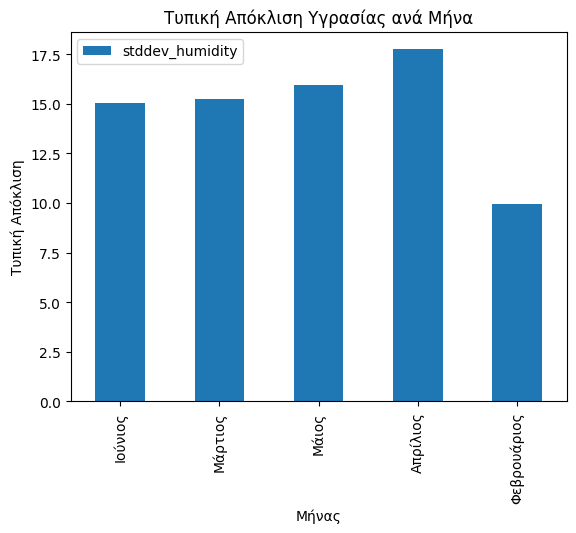

In [52]:
#Για ερώτημα 1.3

# Προετοιμασία των δεδομένων για το γράφημα
monthly_stddev_humidity_df = monthly_stddev_humidity.toPandas()
monthly_stddev_humidity_df["month"] = monthly_stddev_humidity_df["month"].apply(convert_to_greek_month)
monthly_stddev_humidity_df = monthly_stddev_humidity_df.set_index("month")

# Εμφάνιση του γραφήματος
monthly_stddev_humidity_df.plot(kind="bar", title="Τυπική Απόκλιση Υγρασίας ανά Μήνα", ylabel="Τυπική Απόκλιση", xlabel="Μήνας")
plt.show()

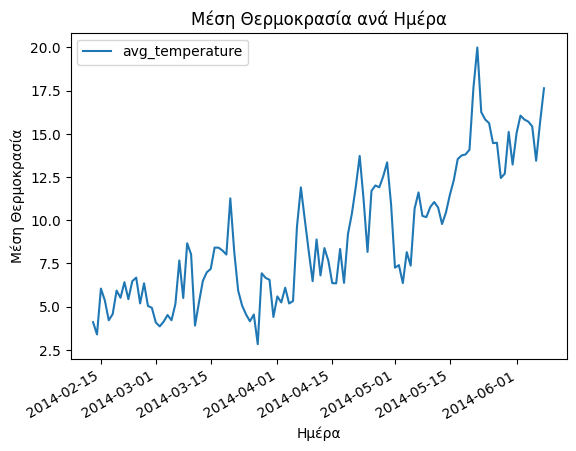

In [53]:
# Προετοιμασία των δεδομένων για το γράφημα
daily_avg_temps_df = daily_avg_temps.toPandas()
daily_avg_temps_df["date"] = pd.to_datetime(daily_avg_temps_df["date"])
daily_avg_temps_df = daily_avg_temps_df.set_index("date")

# Εμφάνιση του γραφήματος
daily_avg_temps_df.plot(kind="line", title="Μέση Θερμοκρασία ανά Ημέρα", ylabel="Μέση Θερμοκρασία", xlabel="Ημέρα")
plt.show()

In [54]:
# Κλείσιμο του spark session
spark.stop()